In [ ]:
from pandas_datareader import DataReader
import datetime
import matplotlib.pyplot as plt


In [ ]:
start=datetime.datetime(2015,1,1)
stop=datetime.datetime.now()
data=DataReader('msft','tiingo',start,stop,access_key='81ea8f4eb139331c7930c16232fb571237cbf90f')
data.shape

<ipython-input-2-ae46aa206e83>:3: FutureWarning: the 'access_key'' keyword is deprecated, use 'api_key' instead.
  data=DataReader('msft','tiingo',start,stop,access_key='81ea8f4eb139331c7930c16232fb571237cbf90f')
<ipython-input-2-ae46aa206e83>:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data=DataReader('msft','tiingo',start,stop,access_key='81ea8f4eb139331c7930c16232fb571237cbf90f')


(2190, 12)

In [ ]:
data.columns

Index(['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [ ]:
data.index

MultiIndex([('msft', '2015-01-02 00:00:00+00:00'),
            ('msft', '2015-01-05 00:00:00+00:00'),
            ('msft', '2015-01-06 00:00:00+00:00'),
            ('msft', '2015-01-07 00:00:00+00:00'),
            ('msft', '2015-01-08 00:00:00+00:00'),
            ('msft', '2015-01-09 00:00:00+00:00'),
            ('msft', '2015-01-12 00:00:00+00:00'),
            ('msft', '2015-01-13 00:00:00+00:00'),
            ('msft', '2015-01-14 00:00:00+00:00'),
            ('msft', '2015-01-15 00:00:00+00:00'),
            ...
            ('msft', '2023-08-31 00:00:00+00:00'),
            ('msft', '2023-09-01 00:00:00+00:00'),
            ('msft', '2023-09-05 00:00:00+00:00'),
            ('msft', '2023-09-06 00:00:00+00:00'),
            ('msft', '2023-09-07 00:00:00+00:00'),
            ('msft', '2023-09-08 00:00:00+00:00'),
            ('msft', '2023-09-11 00:00:00+00:00'),
            ('msft', '2023-09-12 00:00:00+00:00'),
            ('msft', '2023-09-13 00:00:00+00:00'),
            ('m

In [ ]:
data.reset_index(inplace=True)
data.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [ ]:
data.set_index('date',inplace=True)

In [ ]:
data.columns

Index(['symbol', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [ ]:
data.head()

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2015-01-02 00:00:00+00:00,msft,46.760,47.4200,46.54,46.66,27913852,40.532107,41.104202,40.341408,40.445425,27913852,0.0,1.0
2015-01-05 00:00:00+00:00,msft,46.325,46.7300,46.25,46.37,39673865,40.155044,40.506102,40.090033,40.194050,39673865,0.0,1.0
2015-01-06 00:00:00+00:00,msft,45.650,46.7490,45.54,46.38,36447854,39.569946,40.522572,39.474597,40.202718,36447854,0.0,1.0
2015-01-07 00:00:00+00:00,msft,46.230,46.4600,45.49,45.98,29114061,40.072697,40.272063,39.431256,39.855994,29114061,0.0,1.0
2015-01-08 00:00:00+00:00,msft,47.590,47.7499,46.72,46.75,29645202,41.251560,41.390163,40.497434,40.523439,29645202,0.0,1.0


<Axes: xlabel='date'>

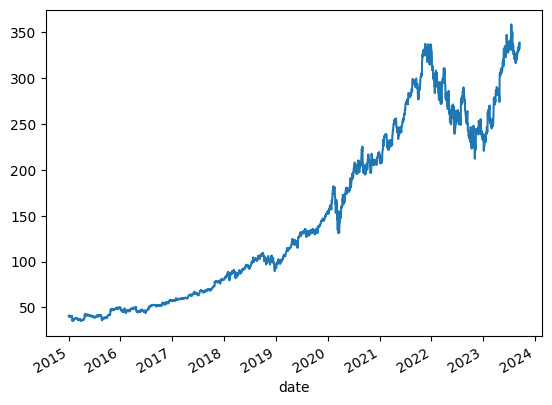

In [ ]:
data['adjClose'].plot()

In [ ]:
from sklearn.preprocessing import scale
data=data[['adjClose','adjHigh', 'adjLow', 'adjOpen', 'adjVolume']]
no_days=40
x=data.drop('adjClose',axis=1)
y=data['adjClose'].shift(-no_days).dropna()

In [ ]:
x=scale(x)

In [ ]:
x1=x[:-no_days]
x2=x[-no_days:]
x1.shape,x2.shape,y.shape

((2150, 4), (40, 4), (2150,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
a=LinearRegression()
a.fit(x_train,y_train)
a.score(x_test,y_test)

0.9718487347285985

In [ ]:
a.predict(x2)

array([353.99494751, 349.38012511, 350.33602002, 356.9331008 ,
       343.0610618 , 334.88757781, 345.11804741, 340.99152934,
       342.84498414, 332.26899713, 335.81266823, 335.51194135,
       336.4534513 , 330.58933919, 327.46184694, 328.45149657,
       328.22523243, 328.79461734, 328.86437197, 329.98031336,
       323.91100035, 321.34569971, 328.13888724, 328.51334592,
       334.89331233, 323.9899846 , 328.54507182, 328.66150307,
       334.15636426, 334.49025792, 336.02918839, 333.68289812,
       340.1991563 , 338.08144641, 337.71620765, 341.10162876,
       343.91682898, 338.91466118, 342.4892807 , 345.37819558])

In [ ]:
data.adjClose.tail(40)

date
2023-07-20 00:00:00+00:00    346.135381
2023-07-21 00:00:00+00:00    343.041946
2023-07-24 00:00:00+00:00    344.379108
2023-07-25 00:00:00+00:00    350.236676
2023-07-26 00:00:00+00:00    337.054653
2023-07-27 00:00:00+00:00    330.019584
2023-07-28 00:00:00+00:00    337.653382
2023-07-31 00:00:00+00:00    335.208571
2023-08-01 00:00:00+00:00    335.627682
2023-08-02 00:00:00+00:00    326.806403
2023-08-03 00:00:00+00:00    325.968182
2023-08-04 00:00:00+00:00    327.085810
2023-08-07 00:00:00+00:00    329.410876
2023-08-08 00:00:00+00:00    325.359474
2023-08-09 00:00:00+00:00    321.547564
2023-08-10 00:00:00+00:00    322.246082
2023-08-11 00:00:00+00:00    320.330148
2023-08-14 00:00:00+00:00    323.353731
2023-08-15 00:00:00+00:00    321.178348
2023-08-16 00:00:00+00:00    320.400000
2023-08-17 00:00:00+00:00    316.880000
2023-08-18 00:00:00+00:00    316.480000
2023-08-21 00:00:00+00:00    321.880000
2023-08-22 00:00:00+00:00    322.460000
2023-08-23 00:00:00+00:00    327.00

In [ ]:
import numpy as np
data['forecast']=np.nan

In [ ]:
data.shape

(2190, 6)

<Axes: xlabel='date'>

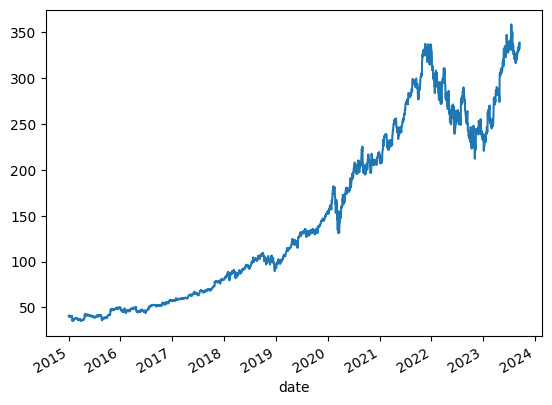

In [ ]:
data['adjClose'].plot()


In [ ]:
data['forecast']=np.nan

In [ ]:
data.shape

(2190, 6)

In [ ]:
data.columns

Index(['adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'forecast'], dtype='object')

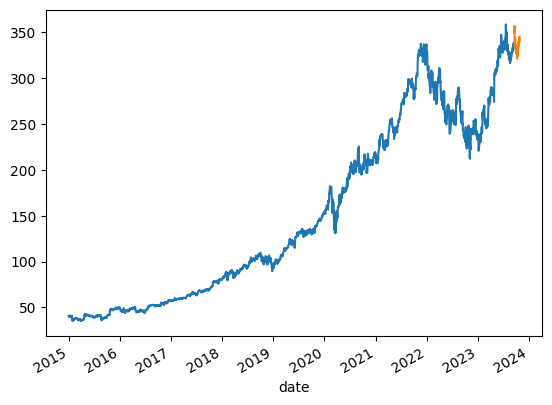

In [ ]:
lastday=data.iloc[-1].name
for i in a.predict(x2):
   lastday+=datetime.timedelta(1)
   data.loc[lastday]=[np.nan for _ in range(5)]+[i]
data['adjClose'].plot()
data['forecast'].plot()
plt.show()